In [6]:
from sim import *
import numpy as np
import matplotlib.pyplot as plt

def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [4, 4]

plot_pretty()

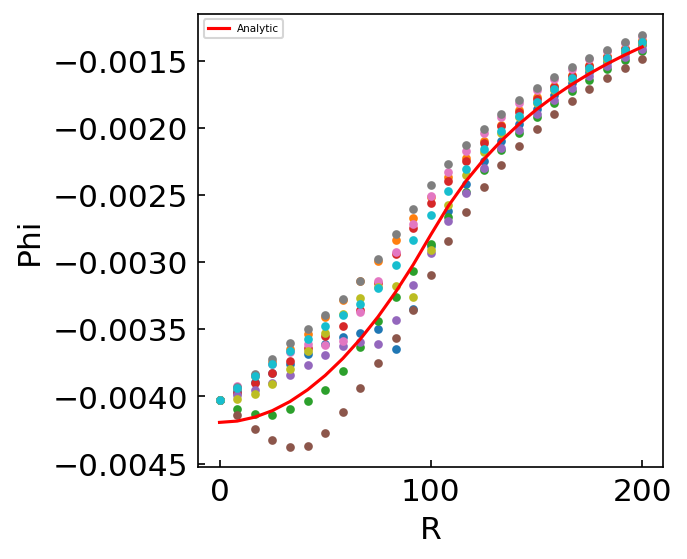

In [9]:
sim1 = Simulation(args(r=100,n=100,p=1000),Distribution(ParticleGenerator.Uniform,Analytic.Uniform))
vecs = angles2vectors(*randangles(10))
default_ray = DefaultRay(200)
for vec in vecs:
    plot_ray(sim1,vec,200)
plt.plot(default_ray.rs(),default_ray.analytic_phis(sim1),label="Analytic",zorder=2,color="red")
plt.legend()
plt.xlabel("R")
plt.ylabel("Phi")
plt.show()

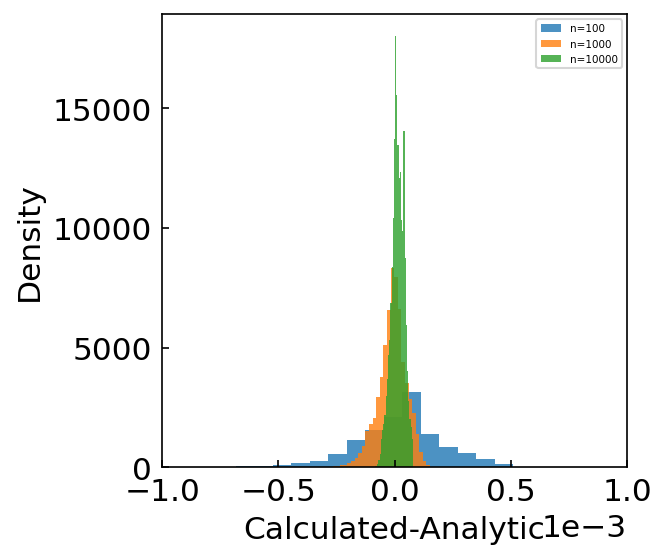

In [8]:
r = 100
ray_length = 120
ray_resolution = 50
for n in [100,1000,10000]:    
    sim = Simulation(args(r=100,n=n,p=1000),Distribution(ParticleGenerator.Uniform,Analytic.Uniform))
    default_ray = DefaultRay(ray_length)
    hist_data = []
    for i in range(10):
        vecs = angles2vectors(*randangles(50))
        for vec in vecs:
            my_ray = Ray(vec,ray_length)
            dist,ana = sim.phis(my_ray(ray_resolution))
            rs = my_ray.rs(ray_resolution)/sim.r
            diffs = dist - ana
            hist_data += list(diffs)
        sim.regen()
    plt.hist(hist_data,density=True,histtype="bar",bins=50,label="n=" + str(n),alpha=0.8)
plt.legend()
plt.xlim([-0.001,0.001])
plt.xlabel("Calculated-Analytic")
plt.ylabel("Density")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()